In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
weeklycovid = pd.read_csv("weeklycovid.csv")

In [3]:
weeklycovid['y'] = weeklycovid['case_count_weekly_change'].shift(-1)

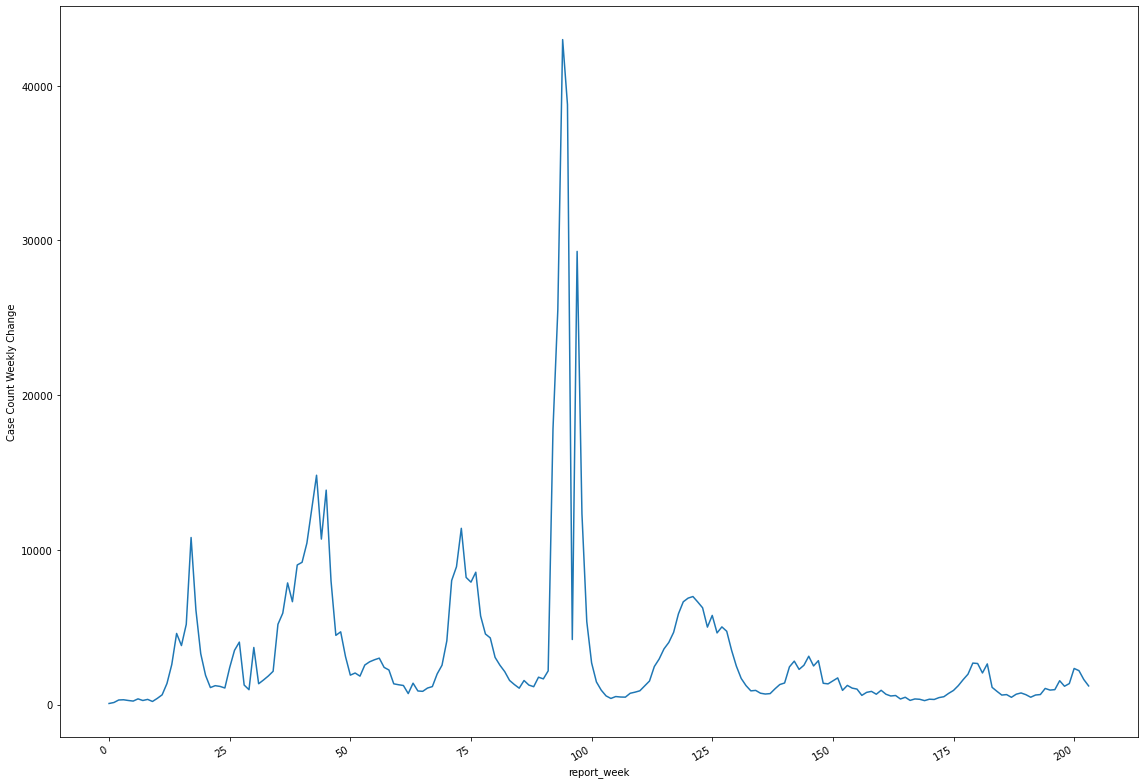

In [4]:
weeklycovid
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(weeklycovid['case_count_weekly_change'])
ax.set_xlabel('report_week')
ax.set_ylabel('Case Count Weekly Change')
fig.autofmt_xdate()
plt.tight_layout()

In [5]:
covid_60 = weeklycovid.iloc[:121]
covid_test = weeklycovid.iloc[121:]
covid_test = covid_test.drop(covid_test.tail(1).index)
X_train = covid_60['case_count_weekly_change'].values.reshape(-1,1)
y_train = covid_60['y'].values.reshape(-1,1)
X_test = covid_test['case_count_weekly_change'].values.reshape(-1,1)
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X=X_train, y=y_train)
dt_pred = dt_reg.predict(X_test)
covid_test['dt_pred'] = dt_pred

In [6]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
covid_test['gbr_pred'] = gbr_pred
covid_test

,reporting_date,report_week,case_count_weekly_change,y,dt_pred,gbr_pred
121,2022/07/18 17:00:00+00,7/12/2022 - 7/18/2022,6984,6631.0,6984.0,7200.887405
122,2022/07/25 17:00:00+00,7/19/2022 - 7/25/2022,6631,6258.0,6882.0,6875.295134
123,2022/08/01 17:00:00+00,7/26/2022 - 8/1/2022,6258,5008.0,3290.0,4345.010290
124,2022/08/08 17:00:00+00,08/02/2022 - 08/08/2022,5008,5764.0,10800.0,8928.554865
125,2022/08/15 17:00:00+00,8/9/2022 - 8/15/2022,5764,4633.0,4563.0,5075.228379
...,...,...,...,...,...,...
198,2024/01/16 18:00:00+00,1/10/2024 - 1/16/2024,1186,1359.0,1073.0,1421.786112
199,2024/01/23 18:00:00+00,01/17/2024 - 01/23/2024,1359,2335.0,2591.0,1709.578275
200,2024/01/30 18:00:00+00,1/24/2024 - 1/30/2024,2335,2193.0,3508.0,3022.588993
201,2024/02/06 18:00:00+00,1/31/2024 - 2/6/2024,2193,1621.0,17817.0,15031.833873


Decision Tree

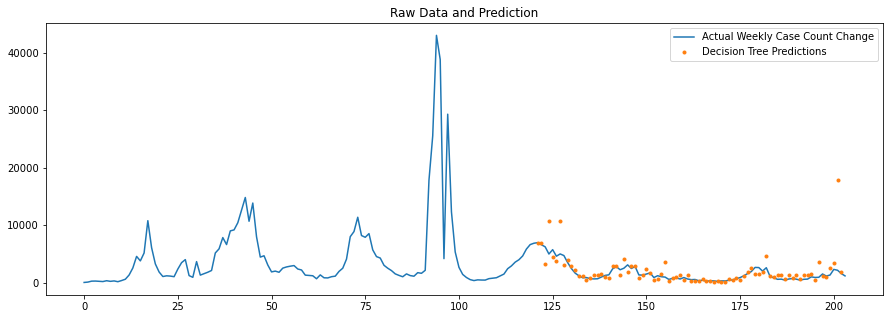

In [8]:
covid_test
covid_test['dt_pred'] = dt_reg.predict(X_test)
weeklycovid = weeklycovid.merge(covid_test[['dt_pred']], how='left', left_index=True, right_index=True)
ax = weeklycovid[['case_count_weekly_change']].plot(figsize=(15, 5))
weeklycovid['dt_pred'].plot(ax=ax, style='.')
plt.legend(['Actual Weekly Case Count Change', 'Decision Tree Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

GBR Model

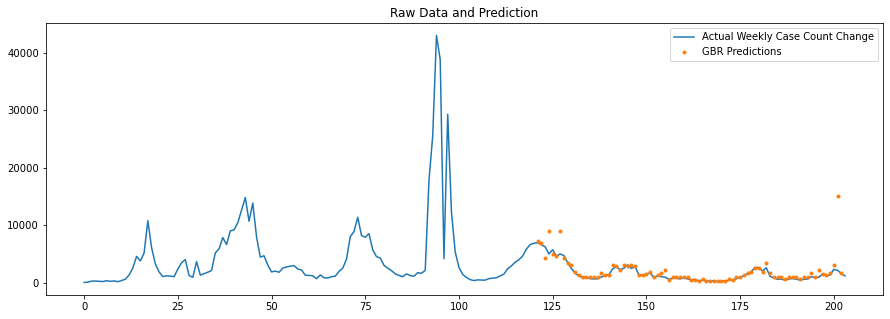

In [7]:
weeklycovid = weeklycovid.merge(covid_test[['gbr_pred']], how='left', left_index=True, right_index=True)
ax = weeklycovid[['case_count_weekly_change']].plot(figsize=(15, 5))
weeklycovid['gbr_pred'].plot(ax=ax, style='.')
plt.legend(['Actual Weekly Case Count Change', 'GBR Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [9]:
weeklycovid.tail

<bound method NDFrame.tail of              reporting_date              report_week  \
0    2020/03/24 09:36:00+00    3/18/2020 - 3/24/2020   
1    2020/03/31 09:36:00+00    3/25/2020 - 3/31/2020   
2    2020/04/07 09:36:00+00      4/1/2020 - 4/7/2020   
3    2020/04/14 09:36:00+00     4/8/2020 - 4/14/2020   
4    2020/04/21 09:36:00+00    4/15/2020 - 4/21/2020   
..                      ...                      ...   
199  2024/01/23 18:00:00+00  01/17/2024 - 01/23/2024   
200  2024/01/30 18:00:00+00    1/24/2024 - 1/30/2024   
201  2024/02/06 18:00:00+00     1/31/2024 - 2/6/2024   
202  2024/02/13 18:00:00+00     2/7/2024 - 2/13/2024   
203  2024/02/20 18:00:00+00    2/14/2024 - 2/20/2024   

     case_count_weekly_change       y      gbr_pred  dt_pred  
0                          72   134.0           NaN      NaN  
1                         134   297.0           NaN      NaN  
2                         297   312.0           NaN      NaN  
3                         312   265.0        

In [33]:
select = -2
last_gbr_pred = weeklycovid.iloc[select]['gbr_pred'] # find the latest GBR model prediction number
last_count = weeklycovid.iloc[select]['case_count_weekly_change'] # find the latest GBR model prediction number
#print(last_gbr_pred)
#print(last_count)
#print(last_gbr_pred - last_count)
#change = (last_gbr_pred - last_count) / last_count
change = f"{(last_gbr_pred - last_count) / last_count:.0%}"
print(change)

9%


Code For Daily Data Model

In [ ]:
#df = pd.read_csv("dailycovid.csv")
#covid_df = df[['Reporting Date','Total Case Daily Change']]
#covid_df['y'] = covid_df['Total Case Daily Change'].shift(-1)
#covid_df.drop(index=covid_df.index[:38], axis=0, inplace=True)
#covid_df = covid_df.dropna()
#covid_d_60 = covid_df.iloc[:630]
#covid_d_test = covid_df.iloc[630:]
#covid_d_test = covid_d_test.drop(covid_d_test.tail(2).index)
#X_d_train = covid_d_60['Total Case Daily Change'].values.reshape(-1,1)
#y_d_train = covid_d_60['y'].values.reshape(-1,1)
#X_d_test = covid_d_test['Total Case Daily Change'].values.reshape(-1,1)
#dt_d_reg = DecisionTreeRegressor(random_state=42)
#dt_d_reg.fit(X=X_d_train, y=y_d_train)
#dt_d_pred = dt_d_reg.predict(X_d_test)
#covid_d_test['dt_pred'] = dt_d_pred